
![](images/Müsli.png)

## Import Tool Kit

In [2]:
# import the necessary libraries you need for your analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline

# warnings supression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# read in csv file and display first 5 rows of datset
df = pd.read_excel("data/MuesliProject_raw_data.xlsx")

In [4]:
# read in csv file and display first 5 rows of datset
df_campaign = pd.read_excel("data/MuesliProject_raw_data.xlsx",sheet_name='Campaign Data')
df_process = pd.read_excel("data/MuesliProject_raw_data.xlsx",sheet_name='Order Process Data')
df_intern = pd.read_excel("data/MuesliProject_raw_data.xlsx",sheet_name='InternData Study')

#### Profit1

In [ ]:

df_intern_final

df_intern_final_work = df_intern_final.groupby("work_days_to_process", as_index=False)["order_id"].count()\
    .rename(columns={"order_id":"total"}) 

In [ ]:
sales_profit = df[["order_id","order_date","ship_mode","sales","profit","origin_channel"]]
sales_profit["order_date"] = pd.to_datetime(sales_profit["order_date"])

sales_profit["year"] = sales_profit["order_date"].dt.year
sales_profit["month"] = sales_profit["order_date"].dt.month_name()
sales_profit["sales"] = sales_profit["sales"].astype('float')
sales_profit["profit"] = sales_profit["profit"].astype('float')

sales_profit["sales"] = sales_profit["sales"].round(2)
sales_profit["profit"] = sales_profit["profit"].round(2)

In [32]:
sales_profit_1 = sales_profit.groupby(["month","year"], as_index=False)["sales","profit"].sum() 
month = ['January', 'February', 'March', 'April', 'May', 'June','July','August','September','October','November','December']
sales_profit_1["month"] = pd.CategoricalIndex(sales_profit_1["month"], categories=month,ordered=True )
sales_profit_1 = sales_profit_1.sort_values("month")

sales_profit_2 = sales_profit.groupby(["year"], as_index=False)["sales","profit"].sum() 


## Data Cleaning

#### Column Cleaning and dropping duplicates

In [5]:
#column cleaning
headers = df.iloc[0]
df.rename(columns=headers, inplace=True)
df.drop(df.index[0], inplace=True)

#drop the new index column
df = df.reset_index(col_level=0)
df.drop('index',axis=1,inplace=True)

In [6]:
#change the column description - underscore instead of space and all str lower
cols = df.columns.tolist()
df.columns = [col.replace(' ','_').lower()for col in cols]

cols = df_campaign.columns.tolist()
df_campaign.columns = [col.replace(' ','_').lower()for col in cols]

cols = df_process.columns.tolist()
df_process.columns = [col.replace(' ','_').lower()for col in cols]

cols = df_intern.columns.tolist()
df_intern.columns = [col.replace(' ','_').lower()for col in cols]


In [7]:
#drop the duplicates from these tables
df_campaign.drop_duplicates(subset='order_id', keep='first' ,inplace=True, ignore_index=False)
df_process.drop_duplicates(subset='order_id', keep='first' ,inplace=True, ignore_index=False)
df_intern.drop_duplicates(subset='order_id', keep='first' ,inplace=True, ignore_index=False)
df.drop_duplicates(subset='order_id', keep='first' ,inplace=True, ignore_index=False)

In [8]:
#merge all tables
df_arrival= df.merge(df_campaign, how='left' , on='order_id').merge(df_process,how='inner', on='order_id').merge(df_intern,how='left', on='order_id')

df_arrival.head()

,index,order_id,order_date_x,ship_mode_x,customer_id,customer_name_x,origin_channel,country/region,city,state,...,discount,profit,arrival_scan_date,customer_name_y,row_id,order_date_y,on_truck_scan_date,ship_mode_y,ready_to_ship_date,pickup_date
0,27.0,CA-2019-121755,2019-01-16 00:00:00,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,...,0.0,11.7741,NaT,NaN,26.0,2019-01-16,2019-01-23,Standard Processing,NaT,NaT
1,45.0,CA-2019-118255,2019-03-11 00:00:00,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,...,0.0,19.7714,NaT,NaN,45.0,2019-03-11,2019-03-13,Express,NaT,NaT
2,48.0,CA-2019-169194,2019-06-20 00:00:00,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,...,0.0,4.95,NaT,NaN,48.0,2019-06-20,2019-06-26,Standard Processing,NaT,NaT
3,60.0,CA-2019-111682,2019-06-17 00:00:00,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,...,0.0,3.3,NaT,NaN,56.0,2019-06-17,2019-06-19,Express,NaT,NaT
4,87.0,CA-2020-155558,2020-10-26 00:00:00,Standard Class,PG-18895,Paul Gonzalez,Email,United States,Rochester,Minnesota,...,0.0,6.7966,NaT,NaN,87.0,2020-10-26,2020-11-04,Standard Processing,NaT,NaT


In [9]:
#only take the column that are needed
df_arrival_final = df_arrival[["order_id", "order_date_x", "ready_to_ship_date", "pickup_date", "on_truck_scan_date", "arrival_scan_date", "ship_mode_y", "ship_mode_x"]]

#### Order Process Table

In [10]:
#the final order process table - take only columns needed from the df_arrival_final
df_order_process_final = df_arrival_final[["order_id", "order_date_x", "on_truck_scan_date" ,"ship_mode_y", "ship_mode_x"]]
df_order_process_final.head()

,order_id,order_date_x,on_truck_scan_date,ship_mode_y,ship_mode_x
0,CA-2019-121755,2019-01-16 00:00:00,2019-01-23,Standard Processing,Second Class
1,CA-2019-118255,2019-03-11 00:00:00,2019-03-13,Express,First Class
2,CA-2019-169194,2019-06-20 00:00:00,2019-06-26,Standard Processing,Standard Class
3,CA-2019-111682,2019-06-17 00:00:00,2019-06-19,Express,First Class
4,CA-2020-155558,2020-10-26 00:00:00,2020-11-04,Standard Processing,Standard Class


In [123]:
df_order_process_final["on_truck_weekday"] = df_order_process_final["on_truck_scan_date"].dt.day_name()

/var/folders/6n/n70xt0sd2x36v6q769jm7gw80000gn/T/ipykernel_35983/462241309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order_process_final["on_truck_weekday"] = df_order_process_final["on_truck_scan_date"].dt.day_name()


#### Campaign Table

In [11]:
#the final campaign table
df_campaign_final = df_order_process_final.merge(df_campaign, how='inner' , on='order_id')

In [12]:
#to cut out the weekend and only have weekdays
df_campaign_final["total_delivery_days"]=np.busday_count(df_campaign_final ['order_date_x'].values.astype('datetime64[D]'), df_campaign_final ['arrival_scan_date'].values.astype('datetime64[D]'), weekmask='Mon Tue Wed Thu Fri')

In [13]:
df_campaign_final['total_delivery_days_w_weekend'] = (df_campaign_final['arrival_scan_date'] - df_campaign_final['order_date_x']).dt.days 

/opt/anaconda3/envs/muelsi/lib/python3.9/site-packages/pandas/core/arrays/datetimelike.py:1187: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  warnings.warn(


In [14]:
df_campaign_final["week_day_arrival"] =df_campaign_final["arrival_scan_date"].dt.day_name()

In [15]:
df_campaign_final['order_date_x'] = pd.to_datetime(df_campaign_final['order_date_x'])
df_campaign_final["week_day_arrival"] =df_campaign_final["arrival_scan_date"].dt.day_name()
df_campaign_final["week_day_order"] =df_campaign_final["order_date_x"].dt.day_name()


In [16]:
df_campaign_final['how_many_weekends'] = ((df_campaign_final['total_delivery_days_w_weekend'] - df_campaign_final['total_delivery_days'])/2)
df_campaign_final['how_many_weekends'] = df_campaign_final['how_many_weekends'].astype('int64')

In [63]:
df_campaign_final['days_till_delivery'] = (df_campaign_final['arrival_scan_date'] - df_campaign_final['on_truck_scan_date']).dt.days 

In [64]:
df_campaign_final.head()

,order_id,order_date_x,on_truck_scan_date,ship_mode_y,ship_mode_x,arrival_scan_date,customer_name,total_delivery_days,total_delivery_days_w_weekend,week_day_arrival,week_day_order,how_many_weekends,days_till_delivery
0,CA-2019-145625,2019-09-11,2019-09-18,Standard Processing,Standard Class,2019-09-23,Kelly Collister,8,12,Monday,Wednesday,2,5
1,CA-2019-162138,2019-04-23,2019-05-01,Standard Processing,Standard Class,2019-05-06,Grace Kelly,9,13,Monday,Tuesday,2,5
2,CA-2019-169166,2019-05-09,2019-05-15,Standard Processing,Standard Class,2019-05-20,Sonia Sunley,7,11,Monday,Thursday,2,5
3,CA-2020-131954,2020-01-21,2020-01-29,Standard Processing,Standard Class,2020-02-03,Darrin Sayre,9,13,Monday,Tuesday,2,5
4,CA-2019-102981,2019-09-06,2019-09-11,Standard Processing,Second Class,2019-09-16,Mary O'Rourke,6,10,Monday,Friday,2,5


#### Intern Table

In [18]:
#the final intern table
df_intern_final = df_order_process_final.merge(df_intern, how='inner' , on='order_id')

In [19]:
#to cut out the weekend and only have weekdays
df_intern_final["work_days_to_process"]=np.busday_count(df_intern_final ['order_date_x'].values.astype('datetime64[D]'), df_intern_final ['ready_to_ship_date'].values.astype('datetime64[D]'), weekmask='Mon Tue Wed Thu Fri')

In [20]:
#to cut out the weekend and only have weekdays
df_intern_final["work_days_to_truck"]=np.busday_count(df_intern_final ['order_date_x'].values.astype('datetime64[D]'), df_intern_final ['on_truck_scan_date'].values.astype('datetime64[D]'), weekmask='Mon Tue Wed Thu Fri')

In [21]:
df_intern_final['waiting_for_truck'] = df_intern_final['work_days_to_truck'] - df_intern_final['work_days_to_process']

In [22]:
df_intern_final = df_intern_final[["order_id","order_date_x","on_truck_scan_date","ship_mode_y","ship_mode_x","ready_to_ship_date","pickup_date","work_days_to_process","waiting_for_truck","work_days_to_truck"]]

In [105]:
df_intern_final.head(1)

,order_id,order_date_x,on_truck_scan_date,ship_mode_y,ship_mode_x,ready_to_ship_date,pickup_date,work_days_to_process,waiting_for_truck,work_days_to_truck
0,CA-2020-119004,2020-11-23 00:00:00,2020-12-02,Standard Processing,Standard Class,2020-11-30,2020-12-02,5,2,7


In [106]:
df_intern_final["week_day_ready_to_ship"] = df_intern_final["ready_to_ship_date"].dt.day_name()

In [107]:
df_intern_final.head()

,order_id,order_date_x,on_truck_scan_date,ship_mode_y,ship_mode_x,ready_to_ship_date,pickup_date,work_days_to_process,waiting_for_truck,work_days_to_truck,week_day_ready_to_ship
0,CA-2020-119004,2020-11-23 00:00:00,2020-12-02,Standard Processing,Standard Class,2020-11-30,2020-12-02,5,2,7,Monday
1,CA-2019-145625,2019-09-11 00:00:00,2019-09-18,Standard Processing,Standard Class,2019-09-17,2019-09-18,4,1,5,Tuesday
2,CA-2020-135307,2020-11-26 00:00:00,2020-11-27,Express,First Class,2020-11-27,2020-11-27,1,0,1,Friday
3,CA-2019-102981,2019-09-06 00:00:00,2019-09-11,Standard Processing,Second Class,2019-09-09,2019-09-11,1,2,3,Monday
4,US-2020-155425,2020-11-10 00:00:00,2020-11-12,Express,First Class,2020-11-11,2020-11-12,1,1,2,Wednesday


## Exploratory Data Analysis

#### Profit

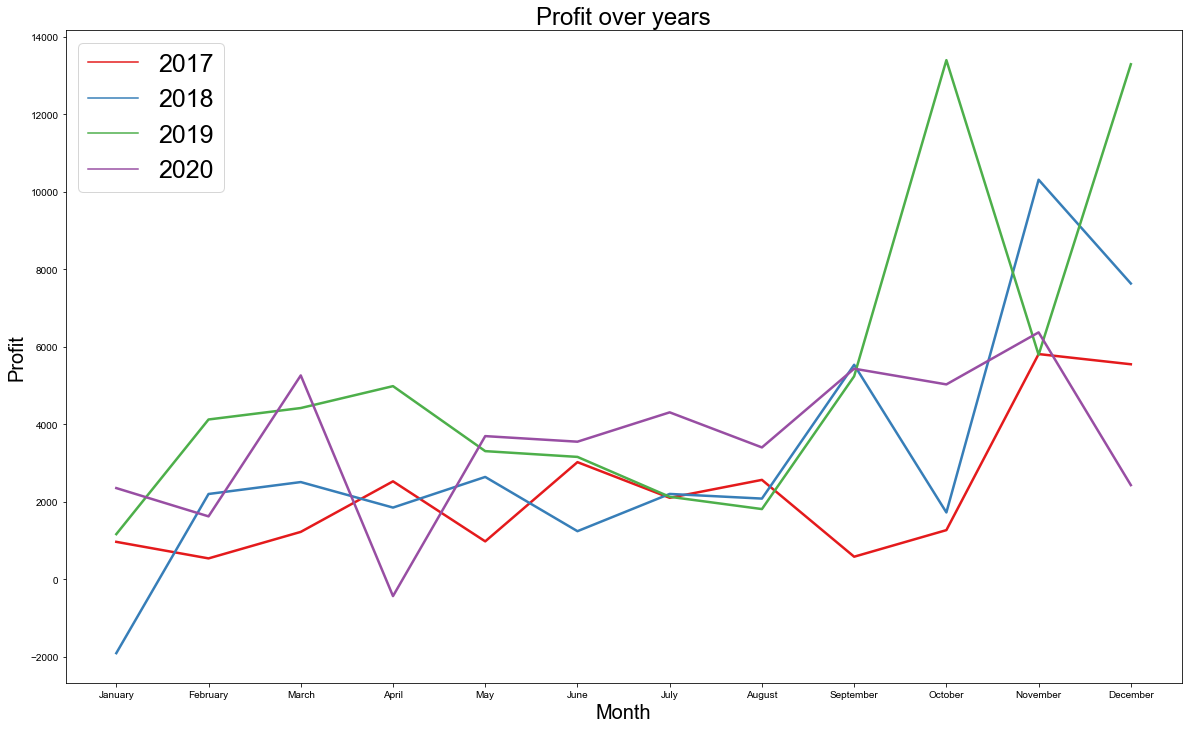

In [39]:
plt.figure(figsize=(20,12))


sns.lineplot(x='month',y='profit',data=sales_profit_1,hue='year',linewidth=2.5,palette='Set1'
)
plt.legend(fontsize=25)
plt.xlabel('Month', size=20)
plt.ylabel('Profit', size=20);
plt.title("Profit over years", size=24)
sns.set(font_scale = 0.9)


#### Understanding the Delivery process

<img src="./images/Supply_chain.png" width=70% height=70%>

__Whats our Data?__

<img src="./images/Data_source.png" width=70% height=70%>

__Is it enough?__

<img src="./images/Data.png" width=70% height=70%>

__Now lets find out what the data tells us__

#### Thesis of warehouse manager: "order processes in warehouse normally take 2 days"

    Is this true?

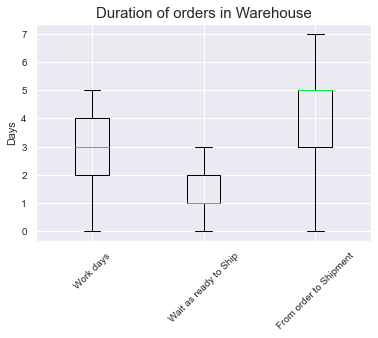

In [128]:
process_days = df_intern_final[["order_id","work_days_to_process","waiting_for_truck","work_days_to_truck"]]

# define style
plt.style.use('seaborn-bright') 

# Set figure size
plt.figure(figsize=(6, 4))

# Create boxplots for distribution of alcohol and fixed acidity
plt.boxplot(x = [process_days["work_days_to_process"], process_days["waiting_for_truck"],process_days["work_days_to_truck"]])

# Set locations and labels of ticks on x-axis as well as rotation
plt.xticks(ticks=[1, 2,3], labels=['Work days', 'Wait as ready to Ship','From order to Shipment'], rotation=45)
plt.ylabel('Days')
# Set title
plt.title("Duration of orders in Warehouse", fontsize = 15);

* On Average, it takes the warehouse 2,8 days, to get process one order.<br>
* Only 38% of orders are being processed in 2 days or less.
<br>

**Let's take a deeper look at EXPRESS and STANDARD processing.**


In [62]:
df_intern_final.groupby('ship_mode_y')['work_days_to_process'].describe()

,count,mean,std,min,25%,50%,75%,max
ship_mode_y,,,,,,,,
Express,53.0,1.396226,1.182234,0.0,0.0,2.0,2.0,3.0
Standard Processing,151.0,3.251656,1.155962,0.0,2.5,3.0,4.0,5.0


* EXPRESS processing takes 1,39 days on average to get the label "ready to ship".

* For round about 75% of all orders the processing time takes 3,25 days on average.

* Here by the thesis of the warehouse manager is NOT true.

#### Next thesis: “logistic company has an on average 3 day delivery to all locations”

    How about that?

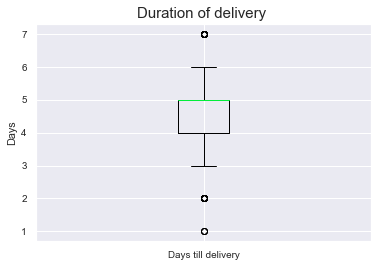

In [129]:
# define style
plt.style.use('seaborn-bright') 

# Set figure size
plt.figure(figsize=(6, 4))

# Create boxplots for distribution of alcohol and fixed acidity
plt.boxplot(x = [df_campaign_final["days_till_delivery"]])

# Set locations and labels of ticks on x-axis as well as rotation
plt.xticks(ticks=[1], labels=['Days till delivery'], rotation=0)
plt.ylabel('Days')
# Set title
plt.title("Duration of delivery ", fontsize = 15);

* The average delivery time is 4,6 days and the median time is 5 days
* Only 19,5 percent of the time the delivery promise of our logistic partner is kept

__Let's take a deeper look at the different Shipping modes.__

In [78]:
crosstb = pd.crosstab(index=df_campaign_final["ship_mode_x"],columns=df_campaign_final["days_till_delivery"], normalize="index")\
    .round(4)*100
display(df_campaign_final.groupby('ship_mode_x')["days_till_delivery"].describe())
display(crosstb)

,count,mean,std,min,25%,50%,75%,max
ship_mode_x,,,,,,,,
First Class,75.0,4.48000,1.339221,2.0,3.0,5.0,5.0,7.0
Second Class,58.0,4.62069,1.225856,2.0,4.0,5.0,5.0,7.0
Standard Class,200.0,4.64500,1.138179,1.0,4.0,5.0,5.0,7.0


days_till_delivery,1,2,3,4,5,6,7
ship_mode_x,,,,,,,
First Class,0.0,4.00,25.33,17.33,36.00,6.67,10.67
Second Class,0.0,5.17,15.52,15.52,46.55,10.34,6.90
Standard Class,1.5,5.50,8.50,11.00,62.50,7.00,4.00


* Even first class shipping mode can only keep the three day promise in 29% of the time

* Keep in mind that the analysis about shipping dates is based on the campaign data

* Basing statistics on the dates customers scanned the QR-Code on their package is NOT reliable at all.

#### Important KPI’s for a smooth warehouse process in the future would be:
* average for processing an order
* average days an order is waiting for a truck
* average days it takes for an order to be loaded on truck

In [103]:

work = df_intern_final["work_days_to_process"].mean()
wait = df_intern_final["waiting_for_truck"].mean()
truck = df_intern_final["work_days_to_truck"].mean()


print(" Average days for processing an order: {} ".format(round(work,2)))
print(" Average days an order is waiting for a truck: {}".format(round(wait,2)))
print(" Average days it takes for an order to be loaded on truck: {} ".format(round(truck,2)))

 Average days for processing an order: 2.77 
 Average days an order is waiting for a truck: 1.36
 Average days it takes for an order to be loaded on truck: 4.13 


#### More important KPIs to look at

In [109]:
df_intern_final.head()

,order_id,order_date_x,on_truck_scan_date,ship_mode_y,ship_mode_x,ready_to_ship_date,pickup_date,work_days_to_process,waiting_for_truck,work_days_to_truck,week_day_ready_to_ship
0,CA-2020-119004,2020-11-23 00:00:00,2020-12-02,Standard Processing,Standard Class,2020-11-30,2020-12-02,5,2,7,Monday
1,CA-2019-145625,2019-09-11 00:00:00,2019-09-18,Standard Processing,Standard Class,2019-09-17,2019-09-18,4,1,5,Tuesday
2,CA-2020-135307,2020-11-26 00:00:00,2020-11-27,Express,First Class,2020-11-27,2020-11-27,1,0,1,Friday
3,CA-2019-102981,2019-09-06 00:00:00,2019-09-11,Standard Processing,Second Class,2019-09-09,2019-09-11,1,2,3,Monday
4,US-2020-155425,2020-11-10 00:00:00,2020-11-12,Express,First Class,2020-11-11,2020-11-12,1,1,2,Wednesday


In [110]:
ready_to_ship_days = df_intern_final.groupby(["week_day_ready_to_ship"], as_index=False)["order_id"].count() \
    .rename(columns={"order_id":"total"}) \
        

In [111]:
ready_to_ship_days

,week_day_ready_to_ship,total
0,Friday,31
1,Monday,93
2,Thursday,28
3,Tuesday,29
4,Wednesday,23


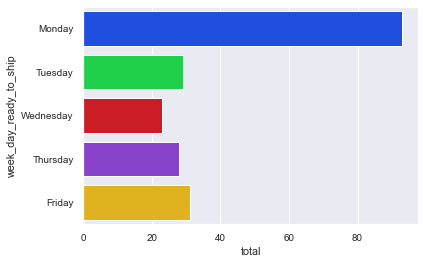

In [116]:
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
ready_to_ship_days["week_day_ready_to_ship"] = pd.CategoricalIndex(ready_to_ship_days["week_day_ready_to_ship"], categories=sorter,ordered=True )


sns.barplot(x='total', y='week_day_ready_to_ship',  data=ready_to_ship_days);

In [124]:
df_order_process_final.head(1)

,order_id,order_date_x,on_truck_scan_date,ship_mode_y,ship_mode_x,on_truck_weekday
0,CA-2019-121755,2019-01-16 00:00:00,2019-01-23,Standard Processing,Second Class,Wednesday


In [125]:
on_truck = df_order_process_final.groupby(["on_truck_weekday"], as_index=False)["order_id"].count() \
    .rename(columns={"order_id":"total"}) \

on_truck

,on_truck_weekday,total
0,Friday,676
1,Monday,548
2,Thursday,46
3,Tuesday,77
4,Wednesday,1655


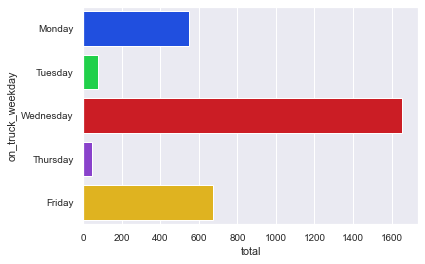

In [126]:
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
on_truck["on_truck_weekday"] = pd.CategoricalIndex(on_truck["on_truck_weekday"], categories=sorter,ordered=True )


sns.barplot(x='total', y='on_truck_weekday',  data=on_truck);